<a href="https://colab.research.google.com/github/jmperalta89/linkedinJMPERALTA/blob/main/WORKSHOP_WEBSCRAPING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB SCRAPING 101


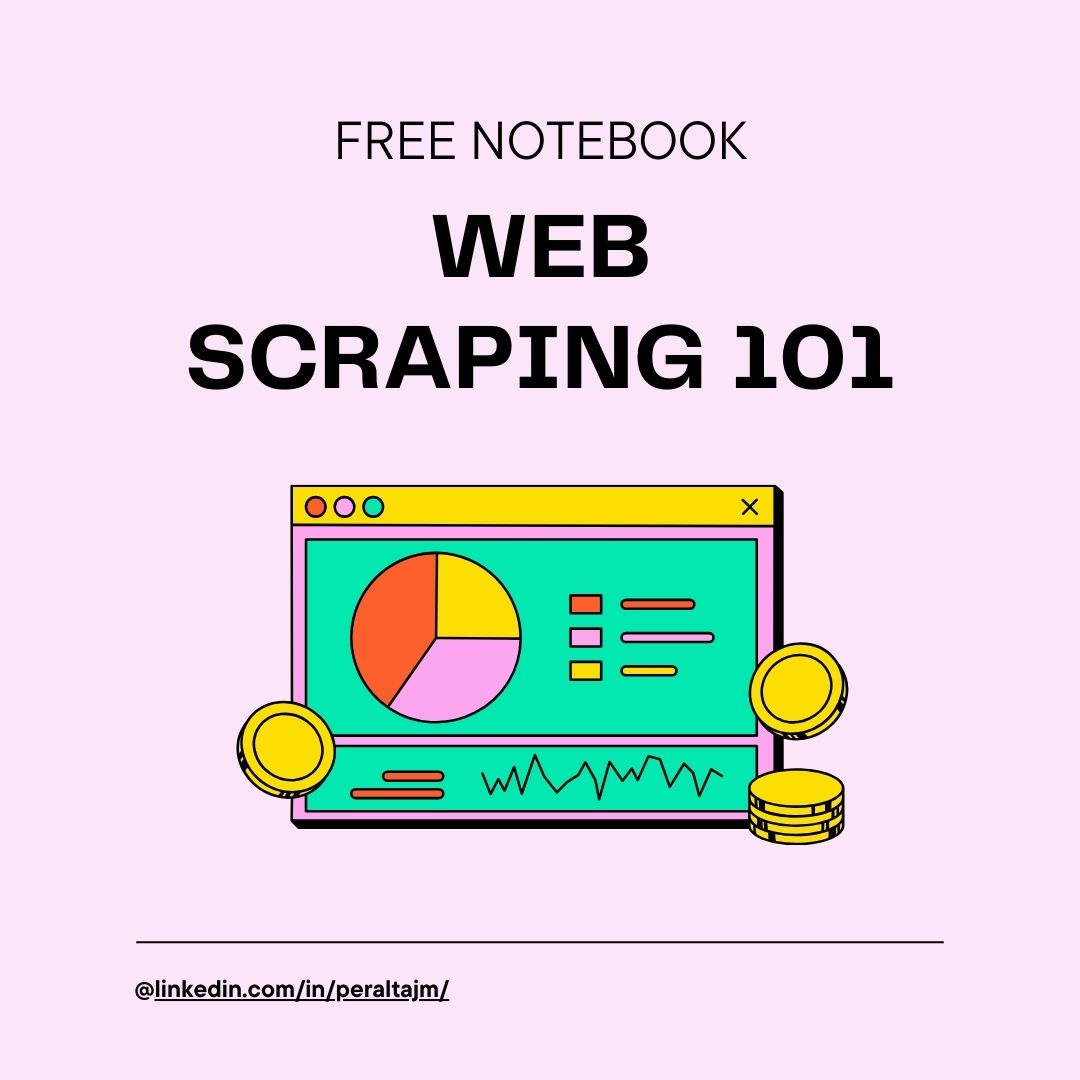

#### Importo librerías

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib

#### URL a utilizar para el scrap

In [ ]:
url = "http://books.toscrape.com/"

#### REQUEST a la página y parseo

In [ ]:
response = requests.get(url)

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')

La elección del parser en este caso es "html.parser", que es el parser incorporado en la biblioteca estándar de Python para analizar HTML. BeautifulSoup también admite otros parsers externos, como "lxml" y "html5lib", que pueden ser más rápidos o más compatibles con HTML más complejo.

#### Exploración de la página

In [ ]:
print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

#### Como identificamos el titulo de los libros? Mirando las etiquetas

EJEMPLO : <article class="product_pod">
  <!-- [...] -->
</article>

In [ ]:
books_html = soup.find_all('article', class_='product_pod')
len(books_html)

20

#### Article es la etiqueta y product la clase

In [ ]:
#PARSING ONE BOOK

In [ ]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [ ]:
book_title="A Light in the Attic"

In [ ]:
books_html[0].find("h3").find("a").attrs

{'href': 'catalogue/a-light-in-the-attic_1000/index.html',
 'title': 'A Light in the Attic'}

In [ ]:
book_title = books_html[0].find("h3").find("a").attrs["title"]
book_title

'A Light in the Attic'

#### Relevo info sobre el precio

In [ ]:
books_html[0].find("p", class_="price_color").string

'£51.77'

In [ ]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

#### Relevo info sobre puntuaciones

In [ ]:
book_stars_html.attrs['class']

['star-rating', 'Three']

#### Creo una función para rating

In [ ]:
def parse_rating(rating_classes):
    if 'One' in rating_classes:
        return 1
    elif 'Two' in rating_classes:
        return 2
    elif 'Three' in rating_classes:
        return 3
    elif 'Four' in rating_classes:
        return 4
    elif 'Five' in rating_classes:
        return 5
    else:
        return 0

In [ ]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])


In [ ]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }


#### LOOP para recorrer todos lás páginas

In [ ]:
for book in books_html:
    title = book.find("h3").find("a").attrs["title"]
    price = float(book.find("p", class_="price_color").text[1:])
    rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)

In [ ]:
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [ ]:
len(books_dict)         # You should have 3 dictionaries


3

In [ ]:
len(books_dict["Title"]) # Each containing 20 elements from the 20 books, as many as on the web page!

20

In [ ]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


## Realizo una visualización

<Axes: xlabel='Rating'>

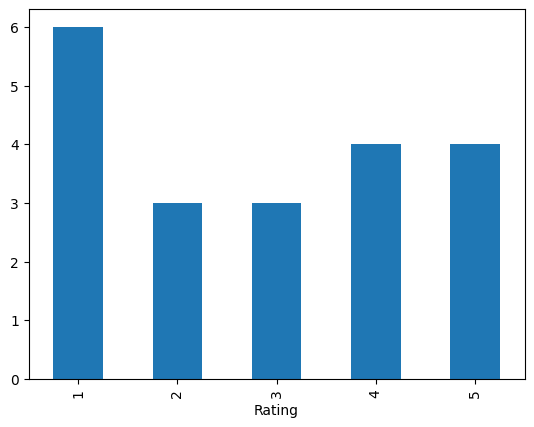

In [ ]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [ ]:
page = 1
url = f"http://books.toscrape.com/catalogue/page-{page}.html"
url

'http://books.toscrape.com/catalogue/page-1.html'

In [ ]:
MAX_PAGE = 3
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html


#### Loop para recopilar la totalidad de info que necesito

In [ ]:
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

MAX_PAGE = 10
for page in range(1, MAX_PAGE + 1):
    print(f"Parsing page {page}...")
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    for book in soup.find_all("article", class_="product_pod"):
        title = book.find("h3").find("a").attrs["title"]
        price = float(book.find("p", class_="price_color").text[1:])
        rating = parse_rating(book.find("p", class_="star-rating").attrs["class"])
        all_books_dict["Title"].append(title)
        all_books_dict["Price"].append(price)
        all_books_dict["Rating"].append(rating)

print("Done!")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Parsing page 6...
Parsing page 7...
Parsing page 8...
Parsing page 9...
Parsing page 10...
Done!


In [ ]:
len(all_books_dict["Title"])

200

In [ ]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
195,Eureka Trivia 6.0,54.59,4
196,Drive: The Surprising Truth About What Motivat...,34.95,4
197,Done Rubbed Out (Reightman & Bailey #1),37.72,5
198,Doing It Over (Most Likely To #1),35.61,3
199,Deliciously Ella Every Day: Quick and Easy Rec...,42.16,3


<Axes: >

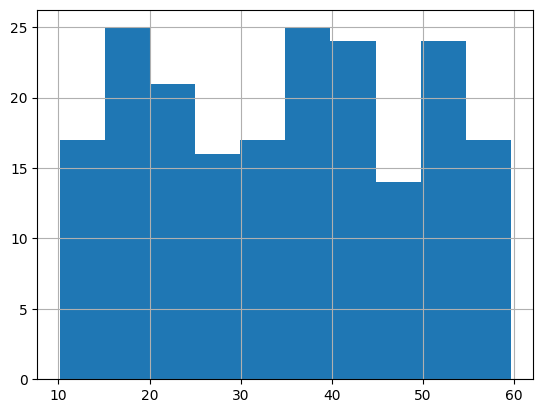

In [ ]:
all_books_df["Price"].hist()

<Axes: xlabel='Rating'>

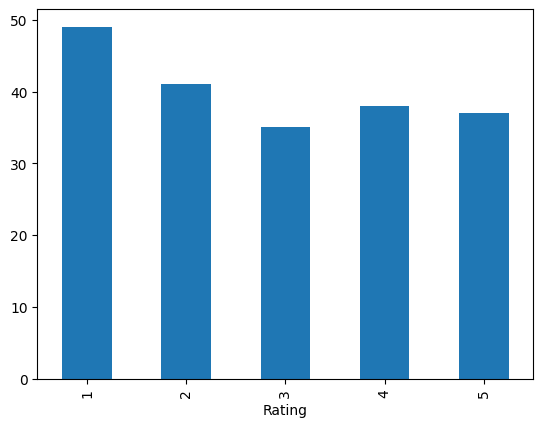

In [ ]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")


# Exporto el output! :) (quedan almacenados en la carpeta donde está la notebook)

In [ ]:
all_books_df.to_csv("books.csv")

In [ ]:
all_books_df.to_excel('books.xlsx', sheet_name='Books')
